**Importing Libraries and Dataset**

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data

train = pd.read_csv('comp_train.csv')
test = pd.read_csv('comp_test.csv')

# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 12)
Shape of test : (23490, 11)


**Data Analysis**

In [3]:
train.head()

,employee_id,department,region,gender,age,Performance_rating,Talent_rating,length_of_service,Crictical_position,No_of_role _change,Final_score,is_promoted
0,65438,GMO,Mumbai,f,35,5.0,5.0,8,0,1,49,0
1,65141,PSAI,Mumbai,m,30,5.0,5.0,4,0,1,60,0
2,7513,Biologics,Mumbai,m,34,3.0,3.0,7,0,1,50,0
3,2542,IPDO,Mumbai,m,39,1.0,1.0,10,0,2,50,0
4,48945,GMO,Mumbai,m,45,3.0,3.0,2,0,1,73,0


In [4]:
test.head()

,employee_id,department,region,gender,age,Performance_rating,Talent_rating,length_of_service,Crictical_position,No_of_role _change,Final_score
0,8724,GMO,Bangalore,m,24,NaN,NaN,1,1,1,77
1,74430,GMO,Bangalore,f,31,3.0,3.0,5,0,1,51
2,72255,GMO,Bangalore,m,31,1.0,1.0,4,0,1,47
3,38562,GMO,Bangalore,f,31,2.0,2.0,9,0,3,65
4,64486,GMO,Bangalore,m,30,4.0,4.0,7,0,1,61


In [5]:
# describing the training set

train.describe(include = 'all')

,employee_id,department,region,gender,age,Performance_rating,Talent_rating,length_of_service,Crictical_position,No_of_role _change,Final_score,is_promoted
count,54808.000000,54808,54808,54808,54808.000000,50684.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,23,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GMO,Chennai,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17685,8000,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,34.803915,3.329256,3.329256,5.865512,0.023172,1.251405,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,7.660169,1.259993,1.259993,4.265094,0.150450,0.595702,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,29.000000,3.000000,3.000000,3.000000,0.000000,1.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,33.000000,3.000000,3.000000,5.000000,0.000000,1.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,39.000000,4.000000,4.000000,7.000000,0.000000,1.000000,76.000000,0.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   department          54808 non-null  object 
 2   region              54808 non-null  object 
 3   gender              54808 non-null  object 
 4   age                 54808 non-null  int64  
 5   Performance_rating  50684 non-null  float64
 6   Talent_rating       50684 non-null  float64
 7   length_of_service   54808 non-null  int64  
 8   Crictical_position  54808 non-null  int64  
 9   No_of_role _change  54808 non-null  int64  
 10  Final_score         54808 non-null  int64  
 11  is_promoted         54808 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 5.0+ MB


In [7]:
# checking if there is any NULL value in the dataset

train.isnull().any()

employee_id           False
department            False
region                False
gender                False
age                   False
Performance_rating     True
Talent_rating          True
length_of_service     False
Crictical_position    False
No_of_role _change    False
Final_score           False
is_promoted           False
dtype: bool

In [8]:
test.isnull().sum()

employee_id              0
department               0
region                   0
gender                   0
age                      0
Performance_rating    1812
Talent_rating         1812
length_of_service        0
Crictical_position       0
No_of_role _change       0
Final_score              0
dtype: int64

**UNi-variate Data Visualization**

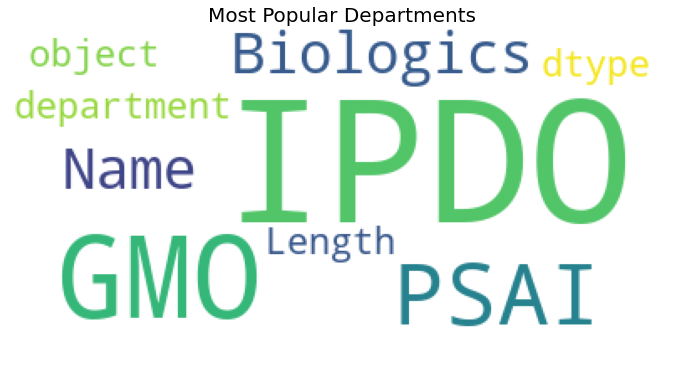

In [9]:
# looking at the most popular departments

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train['department']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 20)
plt.axis('off')
plt.show()

In [10]:
# checkig the no. of Employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [11]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


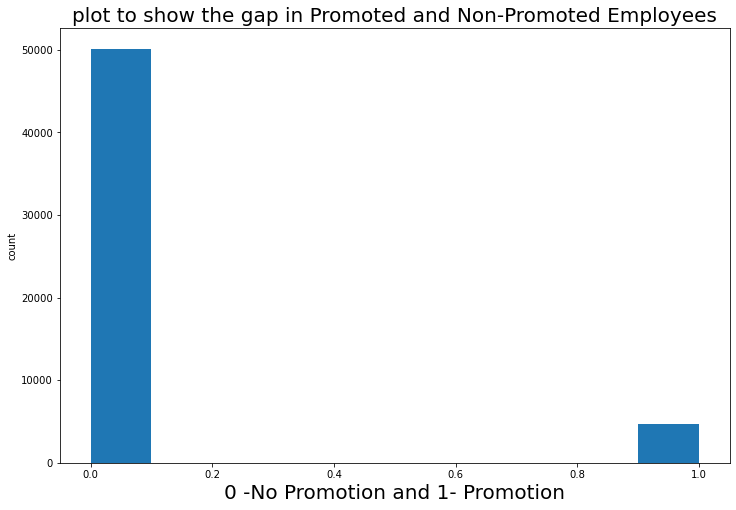

In [12]:
#plotting a scatter plot 

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 20)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

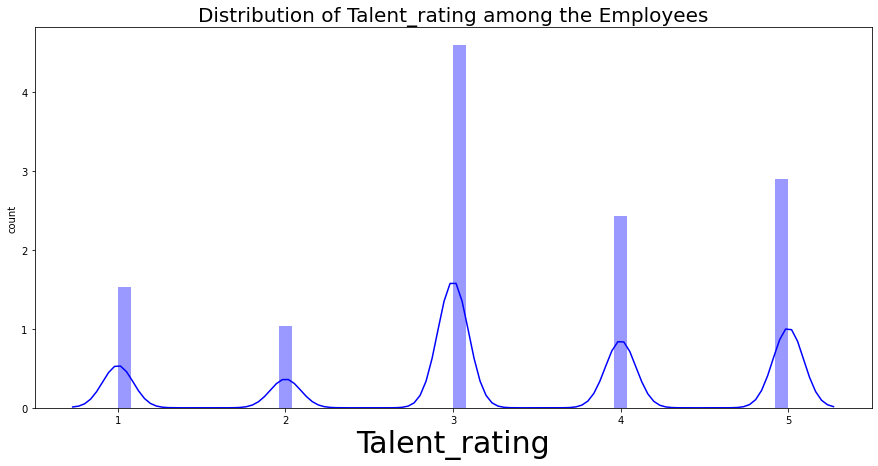

In [13]:
# checking the distribution of the Talent_rating score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['Talent_rating'], color = 'blue')
plt.title('Distribution of Talent_rating among the Employees', fontsize = 20)
plt.xlabel('Talent_rating', fontsize = 30)
plt.ylabel('count')
plt.show()

In [14]:
train['No_of_role _change'].value_counts()

1    44379
2     7988
3     1781
4      470
5      131
6       59
Name: No_of_role _change, dtype: int64

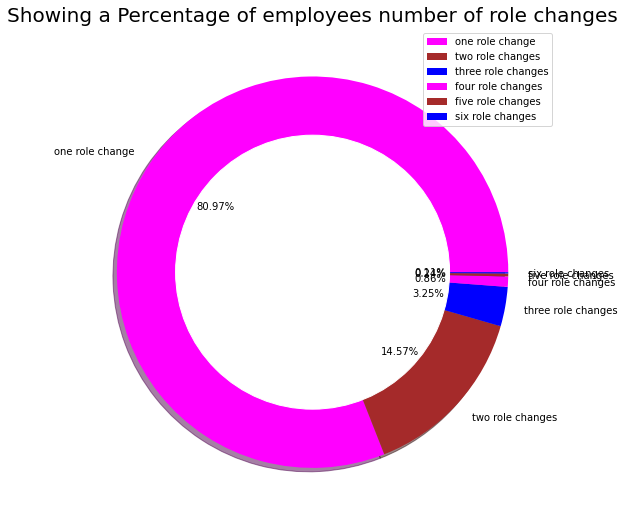

In [15]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [44379,7988,1781,470,131,59]
colors = ['magenta', 'brown','blue']
labels = "one role change", "two role changes","three role changes","four role changes","five role changes","six role changes",

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees number of role changes', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [16]:
train['Crictical_position'].value_counts()

0    53538
1     1270
Name: Crictical_position, dtype: int64

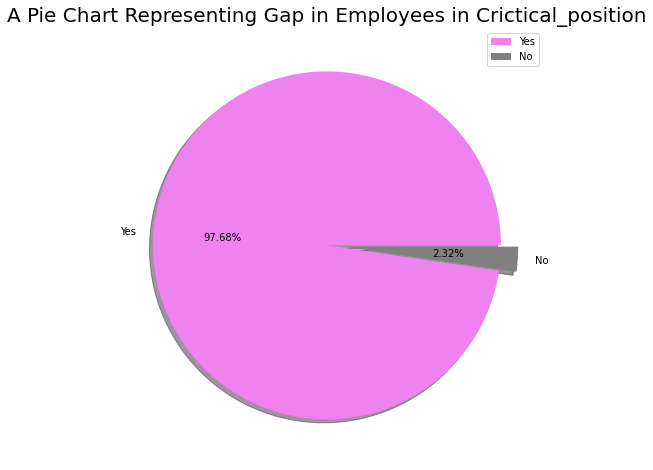

In [17]:
# plotting a pie chart


size = [53538, 1270]
labels = "Yes", "No "
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in Crictical_position', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

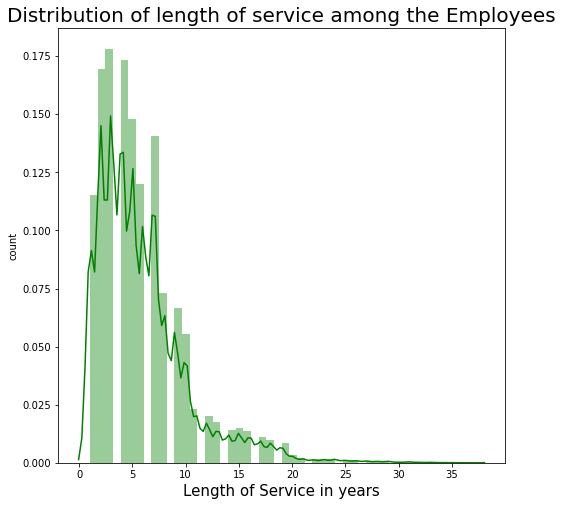

In [18]:
# checking the distribution of length of service

sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 20)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

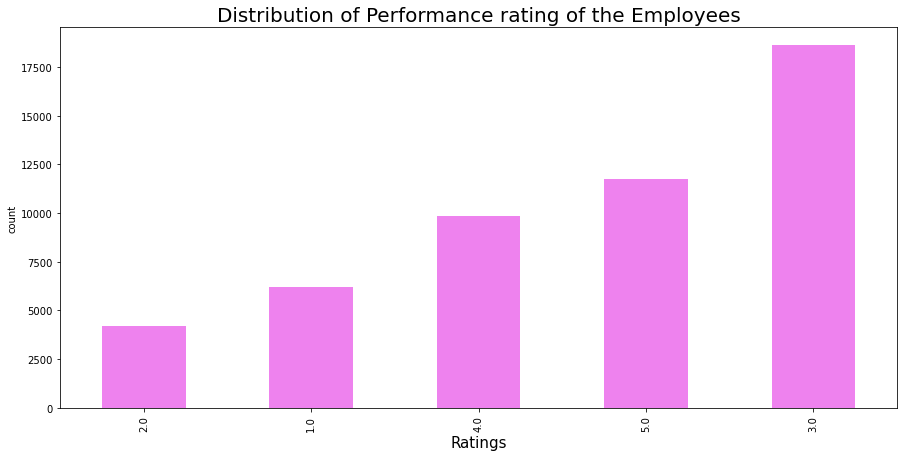

In [19]:
train['Performance_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Performance rating of the Employees', fontsize = 20)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

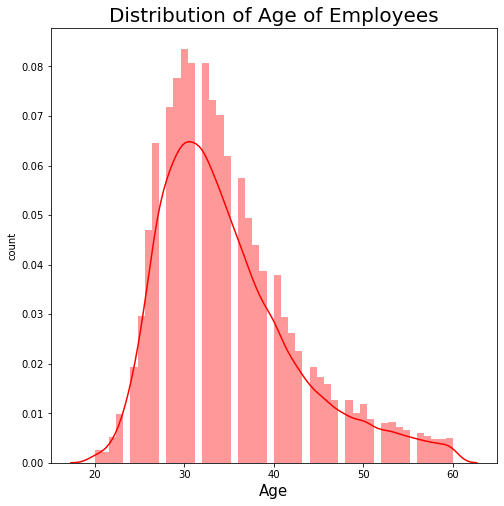

In [20]:
# checking the distribution of age of Employees in the company

sns.distplot(train['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

In [21]:
# checking the gender gap

train['gender'].value_counts()


m    38496
f    16312
Name: gender, dtype: int64

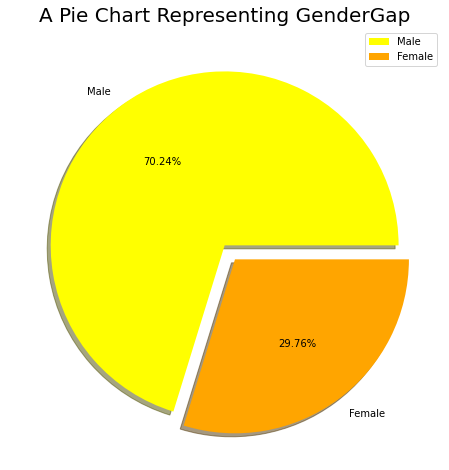

In [22]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

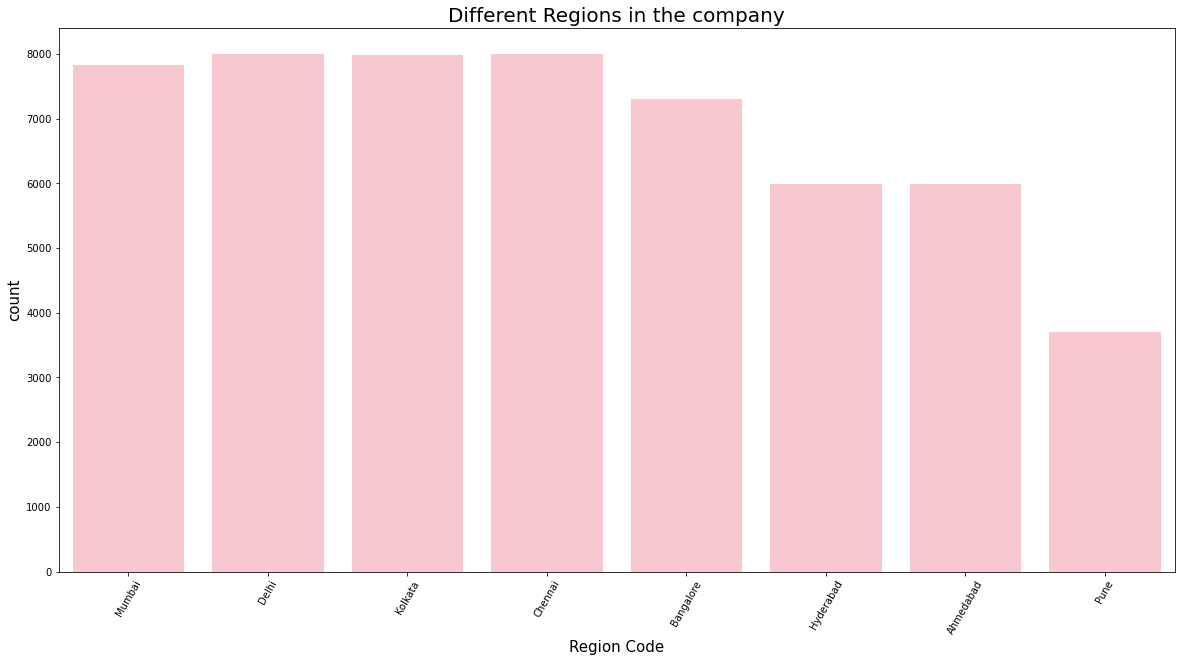

In [23]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['region'], color = 'pink')
plt.title('Different Regions in the company', fontsize = 20)
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

**Bi-varaiate Data Visualization**

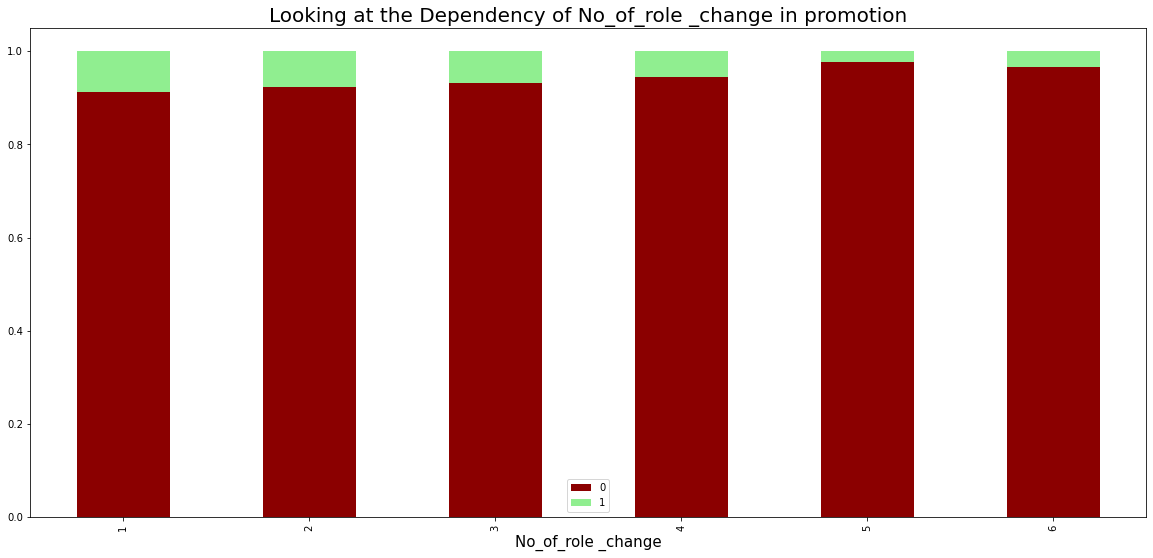

In [24]:
# scatter plot between average No_of_role _change and is_promoted

data = pd.crosstab(train['No_of_role _change'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of No_of_role _change in promotion', fontsize = 20)
plt.xlabel('No_of_role _change', fontsize = 15)
plt.legend()
plt.show()

**As, the No_of_role _changes Increases, the chances of Promotion Increases less**

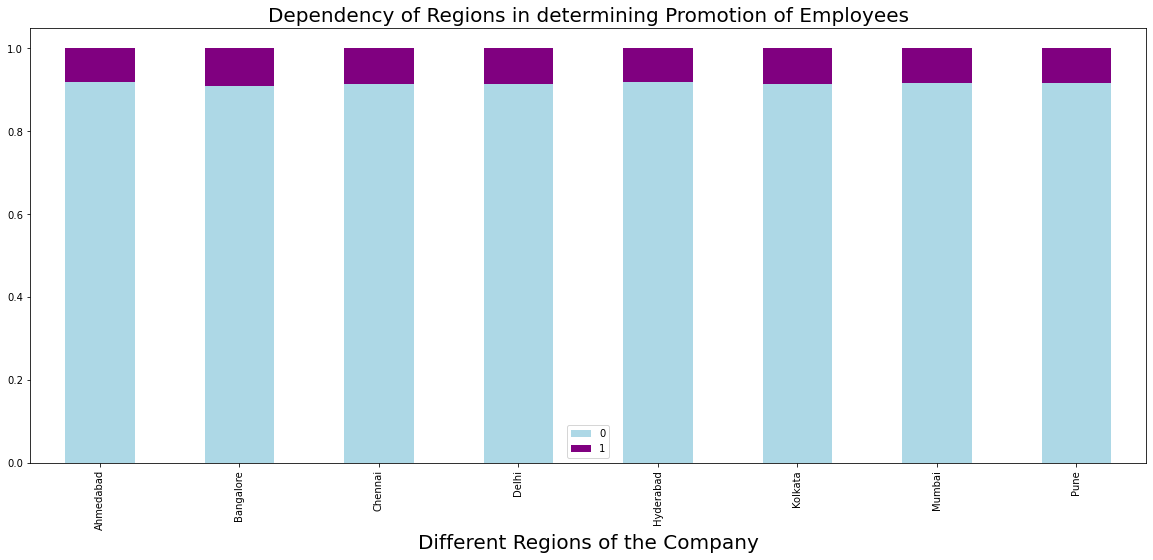

In [25]:
# checking dependency of different regions in promotion

data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 20)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

**The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.**

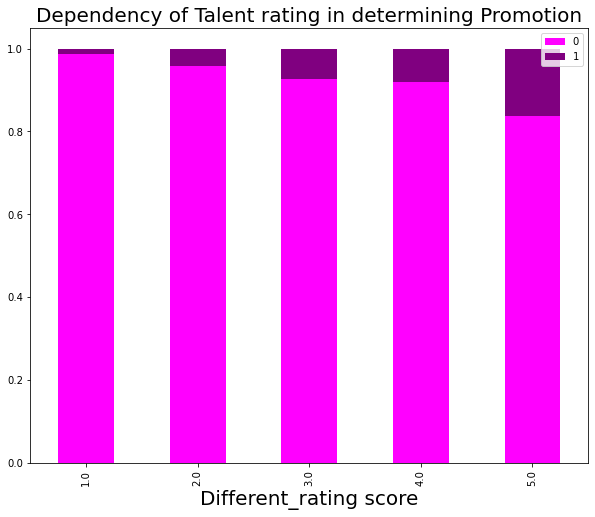

In [26]:
# dependency of Talent_rating on promotion

data = pd.crosstab(train['Talent_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Talent rating in determining Promotion', fontsize = 20)
plt.xlabel('Different_rating score', fontsize = 20)
plt.legend()
plt.show()

**There is a very good chance of getting promoted if the employee has high talent rating 5**

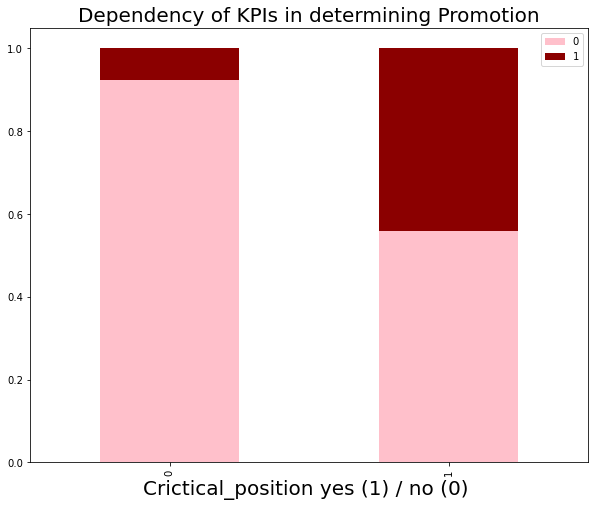

In [27]:
#dependency of # checking dependency on Crictical_position with Promotion

data = pd.crosstab(train['Crictical_position'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 20)
plt.xlabel('Crictical_position yes (1) / no (0) ', fontsize = 20)
plt.legend()
plt.show()

**If employee is a Crictical resource then increases in chances of getting promoted in the company.**

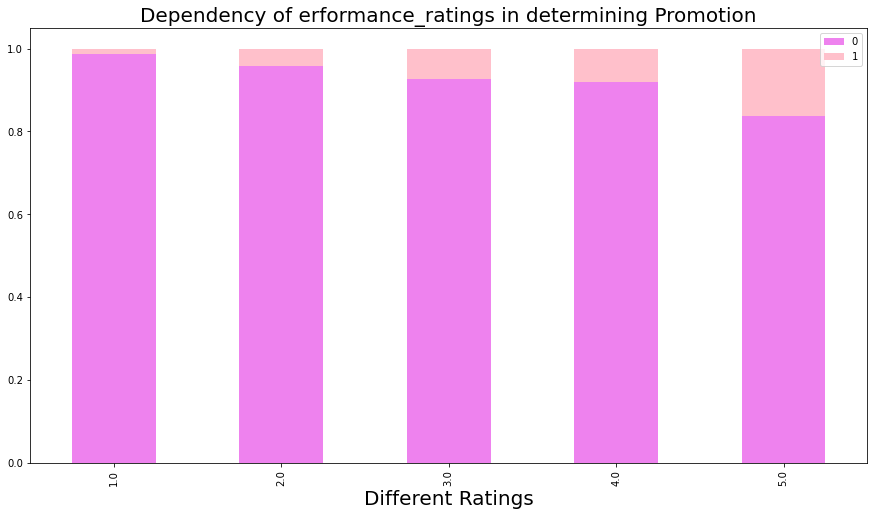

In [28]:
# checking dependency on Performance_rating

data = pd.crosstab(train['Performance_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of erformance_ratings in determining Promotion', fontsize = 20)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

**The Above Graph clearly suggests that performance ratings matter a lot, if the ratings are high, the chances of being promoted  in the company increases and there is completely no promotion for the employees with previous year ratings = 0**

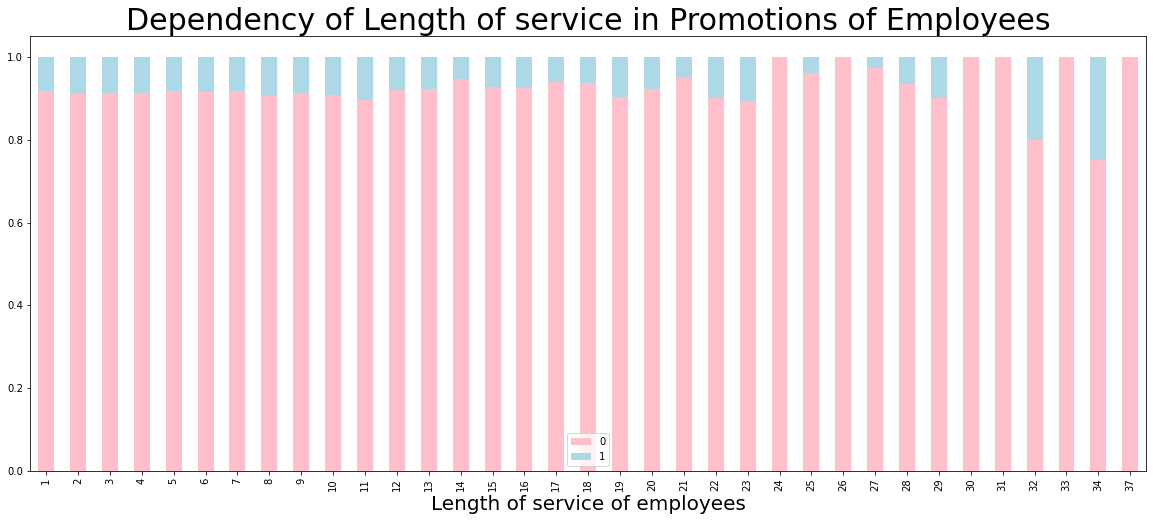

In [29]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

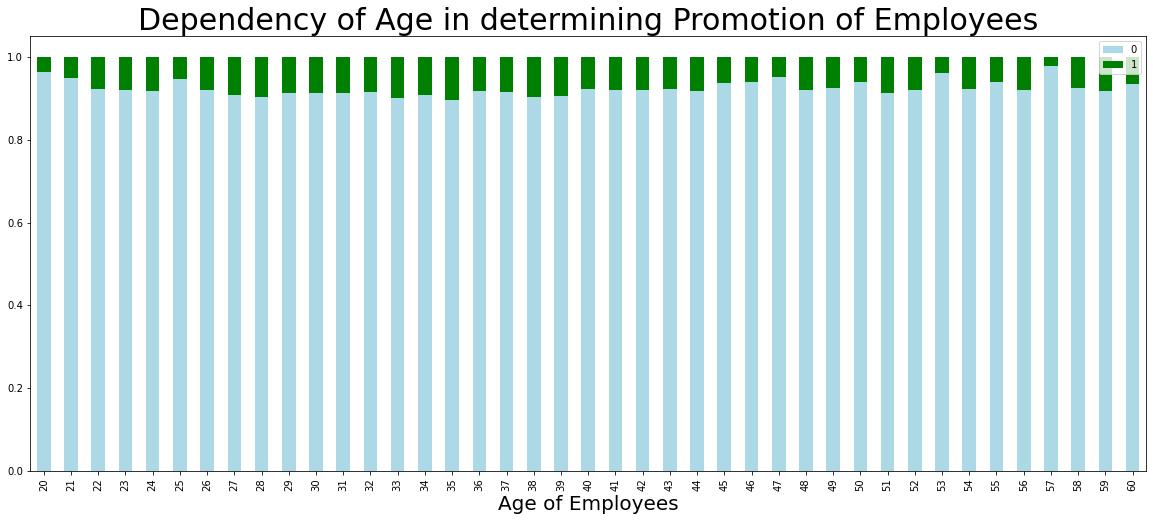

In [30]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

**This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company**

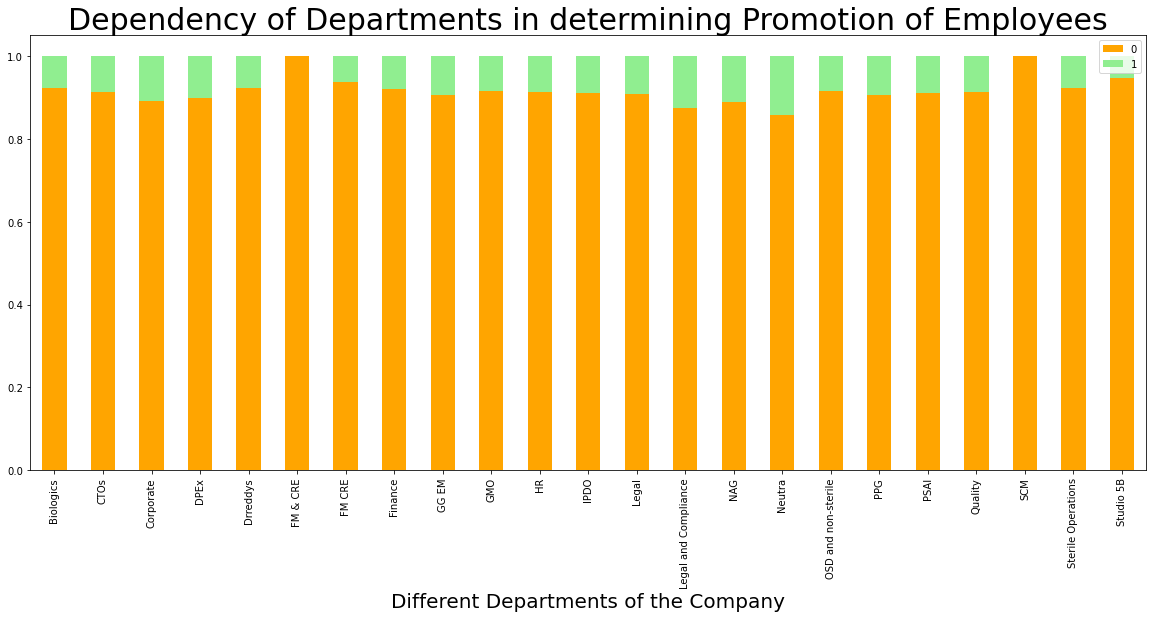

In [31]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

**Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.**

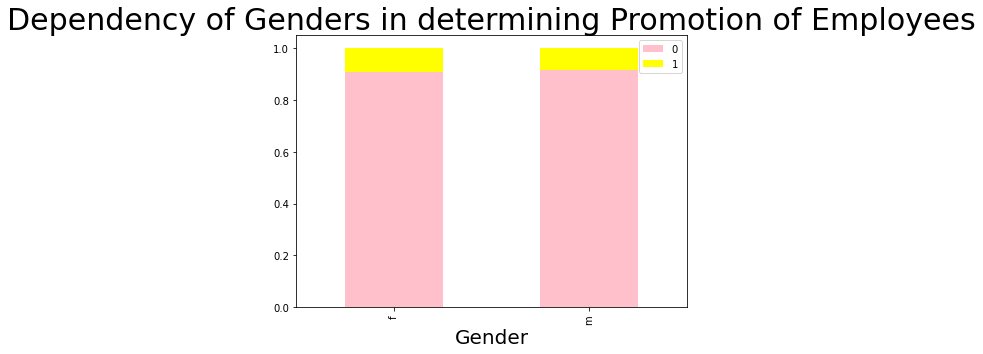

In [32]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

**The above plot shows that there is no partiality between males and females in terms of promotion**

**Data Pre-processing**

In [33]:
# filling missing values


train['Talent_rating'].fillna(train['Talent_rating'].mode()[0], inplace = True)
train['Performance_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [34]:
# filling missing values

test['Talent_rating'].fillna(test['Talent_rating'].mode()[0], inplace = True)
test['Performance_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [35]:
# removing the employee_id column

train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['department', 'region', 'gender', 'age', 'Performance_rating',
       'Talent_rating', 'length_of_service', 'Crictical_position',
       'No_of_role _change', 'Final_score', 'is_promoted'],
      dtype='object')

In [36]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)

test.columns

Index(['department', 'region', 'gender', 'age', 'Performance_rating',
       'Talent_rating', 'length_of_service', 'Crictical_position',
       'No_of_role _change', 'Final_score'],
      dtype='object')

In [37]:
# defining the test set

x_test = test

x_test.columns

Index(['department', 'region', 'gender', 'age', 'Performance_rating',
       'Talent_rating', 'length_of_service', 'Crictical_position',
       'No_of_role _change', 'Final_score'],
      dtype='object')

In [38]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['age', 'Performance_rating', 'Talent_rating', 'length_of_service',
       'Crictical_position', 'No_of_role _change', 'Final_score',
       'department_Biologics', 'department_CTOs', 'department_Corporate',
       'department_DPEx', 'department_Drreddys', 'department_FM & CRE',
       'department_FM CRE', 'department_Finance', 'department_GG EM',
       'department_GMO', 'department_HR', 'department_IPDO',
       'department_Legal', 'department_Legal and Compliance', 'department_NAG',
       'department_Neutra', 'department_OSD and non-sterile', 'department_PPG',
       'department_PSAI', 'department_Quality', 'department_SCM',
       'department_Sterile Operations', 'department_Studio 5B',
       'region_Ahmedabad', 'region_Bangalore', 'region_Chennai',
       'region_Delhi', 'region_Hyderabad', 'region_Kolkata', 'region_Mumbai',
       'region_Pune', 'gender_f', 'gender_m'],
      dtype='object')

In [39]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 10)
Shape of y: (54808,)


In [40]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['age', 'Performance_rating', 'Talent_rating', 'length_of_service',
       'Crictical_position', 'No_of_role _change', 'Final_score',
       'department_Biologics', 'department_CTOs', 'department_Corporate',
       'department_DPEx', 'department_Drreddys', 'department_FM & CRE',
       'department_FM CRE', 'department_Finance', 'department_GG EM',
       'department_GMO', 'department_HR', 'department_IPDO',
       'department_Legal', 'department_Legal and Compliance', 'department_NAG',
       'department_Neutra', 'department_OSD and non-sterile', 'department_PPG',
       'department_PSAI', 'department_Quality', 'department_SCM',
       'department_Sterile Operations', 'department_Studio 5B',
       'region_Ahmedabad', 'region_Bangalore', 'region_Chennai',
       'region_Delhi', 'region_Hyderabad', 'region_Kolkata', 'region_Mumbai',
       'region_Pune', 'gender_f', 'gender_m'],
      dtype='object')

**Oversampling of the Model**

In [41]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 40)
Size of y-sample : (100280, 1)


In [42]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 40)
Shape of x_valid:  (20056, 40)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [43]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

In [44]:
# applying pca


from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_valid = pca.transform(x_valid)


**Modelling**

**Random Forest Classifer**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

print("Validation Accuracy :", rfc.score(x_valid, y_valid))



<ipython-input-45-e2ae1c10bd27>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Training Accuracy : 0.9981427004387714
Validation Accuracy : 0.948494216194655


**Xg-Boost Classifier**

In [46]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy : 0.9487559832469087


**Light Gradient Boosting Classifier**

In [48]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))

print("Validation Accuracy :", lgb.score(x_valid, y_valid))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy : 0.9344460510570403
Validation Accuracy : 0.9287495013960909


**Extra Trees Classifier**

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))

print("Validation Accuracy :", etc.score(x_valid, y_valid))


<ipython-input-49-40c6af797f12>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(x_train, y_train)


Training Accuracy : 0.9982174910251297
Validation Accuracy : 0.9452034303948943


**Cat Boost Classifier**

In [50]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

print("Validation Accuracy :", rfc.score(x_valid, y_valid))


0:	learn: 0.6858113	total: 222ms	remaining: 3m 41s
1:	learn: 0.6785123	total: 257ms	remaining: 2m 8s
2:	learn: 0.6728720	total: 282ms	remaining: 1m 33s
3:	learn: 0.6672064	total: 306ms	remaining: 1m 16s
4:	learn: 0.6611631	total: 333ms	remaining: 1m 6s
5:	learn: 0.6553668	total: 359ms	remaining: 59.4s
6:	learn: 0.6487977	total: 383ms	remaining: 54.3s
7:	learn: 0.6428956	total: 407ms	remaining: 50.5s
8:	learn: 0.6369436	total: 438ms	remaining: 48.3s
9:	learn: 0.6307595	total: 464ms	remaining: 46s
10:	learn: 0.6242208	total: 489ms	remaining: 44s
11:	learn: 0.6180769	total: 514ms	remaining: 42.3s
12:	learn: 0.6125256	total: 538ms	remaining: 40.8s
13:	learn: 0.6067238	total: 563ms	remaining: 39.6s
14:	learn: 0.6007769	total: 588ms	remaining: 38.6s
15:	learn: 0.5956510	total: 621ms	remaining: 38.2s
16:	learn: 0.5903017	total: 647ms	remaining: 37.4s
17:	learn: 0.5858955	total: 673ms	remaining: 36.7s
18:	learn: 0.5802720	total: 698ms	remaining: 36s
19:	learn: 0.5757174	total: 723ms	remaining:

167:	learn: 0.2924711	total: 4.72s	remaining: 23.4s
168:	learn: 0.2916884	total: 4.75s	remaining: 23.3s
169:	learn: 0.2911232	total: 4.77s	remaining: 23.3s
170:	learn: 0.2904777	total: 4.79s	remaining: 23.2s
171:	learn: 0.2897360	total: 4.82s	remaining: 23.2s
172:	learn: 0.2890452	total: 4.85s	remaining: 23.2s
173:	learn: 0.2885180	total: 4.87s	remaining: 23.1s
174:	learn: 0.2878413	total: 4.9s	remaining: 23.1s
175:	learn: 0.2872951	total: 4.92s	remaining: 23.1s
176:	learn: 0.2866361	total: 4.95s	remaining: 23s
177:	learn: 0.2860607	total: 4.98s	remaining: 23s
178:	learn: 0.2855632	total: 5.01s	remaining: 23s
179:	learn: 0.2849682	total: 5.03s	remaining: 22.9s
180:	learn: 0.2843525	total: 5.06s	remaining: 22.9s
181:	learn: 0.2837204	total: 5.09s	remaining: 22.9s
182:	learn: 0.2831408	total: 5.12s	remaining: 22.9s
183:	learn: 0.2826871	total: 5.14s	remaining: 22.8s
184:	learn: 0.2821886	total: 5.17s	remaining: 22.8s
185:	learn: 0.2815959	total: 5.2s	remaining: 22.8s
186:	learn: 0.281018

328:	learn: 0.2401407	total: 9.12s	remaining: 18.6s
329:	learn: 0.2399727	total: 9.15s	remaining: 18.6s
330:	learn: 0.2397773	total: 9.18s	remaining: 18.6s
331:	learn: 0.2396519	total: 9.21s	remaining: 18.5s
332:	learn: 0.2395087	total: 9.23s	remaining: 18.5s
333:	learn: 0.2393684	total: 9.26s	remaining: 18.5s
334:	learn: 0.2392467	total: 9.29s	remaining: 18.4s
335:	learn: 0.2391238	total: 9.32s	remaining: 18.4s
336:	learn: 0.2389968	total: 9.36s	remaining: 18.4s
337:	learn: 0.2388441	total: 9.38s	remaining: 18.4s
338:	learn: 0.2386995	total: 9.42s	remaining: 18.4s
339:	learn: 0.2385458	total: 9.45s	remaining: 18.3s
340:	learn: 0.2383768	total: 9.47s	remaining: 18.3s
341:	learn: 0.2382511	total: 9.5s	remaining: 18.3s
342:	learn: 0.2381145	total: 9.54s	remaining: 18.3s
343:	learn: 0.2379887	total: 9.57s	remaining: 18.3s
344:	learn: 0.2378613	total: 9.6s	remaining: 18.2s
345:	learn: 0.2377467	total: 9.62s	remaining: 18.2s
346:	learn: 0.2376168	total: 9.65s	remaining: 18.2s
347:	learn: 0.

491:	learn: 0.2250347	total: 14.2s	remaining: 14.7s
492:	learn: 0.2249730	total: 14.3s	remaining: 14.7s
493:	learn: 0.2249187	total: 14.3s	remaining: 14.6s
494:	learn: 0.2248696	total: 14.3s	remaining: 14.6s
495:	learn: 0.2248198	total: 14.3s	remaining: 14.6s
496:	learn: 0.2247605	total: 14.4s	remaining: 14.5s
497:	learn: 0.2247042	total: 14.4s	remaining: 14.5s
498:	learn: 0.2246593	total: 14.4s	remaining: 14.5s
499:	learn: 0.2245895	total: 14.4s	remaining: 14.4s
500:	learn: 0.2245291	total: 14.5s	remaining: 14.4s
501:	learn: 0.2244769	total: 14.5s	remaining: 14.4s
502:	learn: 0.2244297	total: 14.5s	remaining: 14.3s
503:	learn: 0.2243767	total: 14.5s	remaining: 14.3s
504:	learn: 0.2243109	total: 14.6s	remaining: 14.3s
505:	learn: 0.2242562	total: 14.6s	remaining: 14.3s
506:	learn: 0.2242139	total: 14.6s	remaining: 14.2s
507:	learn: 0.2241598	total: 14.7s	remaining: 14.2s
508:	learn: 0.2241013	total: 14.7s	remaining: 14.2s
509:	learn: 0.2240508	total: 14.7s	remaining: 14.1s
510:	learn: 

652:	learn: 0.2185408	total: 18.7s	remaining: 9.94s
653:	learn: 0.2185150	total: 18.7s	remaining: 9.91s
654:	learn: 0.2184941	total: 18.8s	remaining: 9.88s
655:	learn: 0.2184687	total: 18.8s	remaining: 9.85s
656:	learn: 0.2184449	total: 18.8s	remaining: 9.82s
657:	learn: 0.2184157	total: 18.8s	remaining: 9.79s
658:	learn: 0.2183830	total: 18.9s	remaining: 9.76s
659:	learn: 0.2183530	total: 18.9s	remaining: 9.73s
660:	learn: 0.2183278	total: 18.9s	remaining: 9.7s
661:	learn: 0.2182962	total: 18.9s	remaining: 9.67s
662:	learn: 0.2182640	total: 19s	remaining: 9.64s
663:	learn: 0.2182322	total: 19s	remaining: 9.61s
664:	learn: 0.2182011	total: 19s	remaining: 9.58s
665:	learn: 0.2181691	total: 19s	remaining: 9.55s
666:	learn: 0.2181408	total: 19.1s	remaining: 9.52s
667:	learn: 0.2181145	total: 19.1s	remaining: 9.48s
668:	learn: 0.2180834	total: 19.1s	remaining: 9.46s
669:	learn: 0.2180597	total: 19.1s	remaining: 9.43s
670:	learn: 0.2180309	total: 19.2s	remaining: 9.4s
671:	learn: 0.2179963	

813:	learn: 0.2143603	total: 23.5s	remaining: 5.36s
814:	learn: 0.2143450	total: 23.5s	remaining: 5.33s
815:	learn: 0.2143212	total: 23.5s	remaining: 5.3s
816:	learn: 0.2142989	total: 23.6s	remaining: 5.28s
817:	learn: 0.2142792	total: 23.6s	remaining: 5.25s
818:	learn: 0.2142647	total: 23.6s	remaining: 5.22s
819:	learn: 0.2142503	total: 23.7s	remaining: 5.19s
820:	learn: 0.2142316	total: 23.7s	remaining: 5.17s
821:	learn: 0.2142117	total: 23.7s	remaining: 5.14s
822:	learn: 0.2141848	total: 23.8s	remaining: 5.11s
823:	learn: 0.2141682	total: 23.8s	remaining: 5.08s
824:	learn: 0.2141436	total: 23.8s	remaining: 5.05s
825:	learn: 0.2141240	total: 23.8s	remaining: 5.02s
826:	learn: 0.2141038	total: 23.9s	remaining: 4.99s
827:	learn: 0.2140806	total: 23.9s	remaining: 4.96s
828:	learn: 0.2140600	total: 23.9s	remaining: 4.93s
829:	learn: 0.2140433	total: 23.9s	remaining: 4.9s
830:	learn: 0.2140228	total: 24s	remaining: 4.87s
831:	learn: 0.2140022	total: 24s	remaining: 4.84s
832:	learn: 0.2139

973:	learn: 0.2114231	total: 27.7s	remaining: 739ms
974:	learn: 0.2114103	total: 27.7s	remaining: 711ms
975:	learn: 0.2113914	total: 27.7s	remaining: 682ms
976:	learn: 0.2113797	total: 27.8s	remaining: 654ms
977:	learn: 0.2113635	total: 27.8s	remaining: 625ms
978:	learn: 0.2113455	total: 27.8s	remaining: 597ms
979:	learn: 0.2113329	total: 27.8s	remaining: 568ms
980:	learn: 0.2113148	total: 27.9s	remaining: 540ms
981:	learn: 0.2112993	total: 27.9s	remaining: 511ms
982:	learn: 0.2112833	total: 27.9s	remaining: 483ms
983:	learn: 0.2112651	total: 28s	remaining: 455ms
984:	learn: 0.2112434	total: 28s	remaining: 426ms
985:	learn: 0.2112287	total: 28s	remaining: 398ms
986:	learn: 0.2112081	total: 28s	remaining: 369ms
987:	learn: 0.2111920	total: 28.1s	remaining: 341ms
988:	learn: 0.2111676	total: 28.1s	remaining: 312ms
989:	learn: 0.2111436	total: 28.1s	remaining: 284ms
990:	learn: 0.2111007	total: 28.1s	remaining: 256ms
991:	learn: 0.2110807	total: 28.2s	remaining: 227ms
992:	learn: 0.211064

**Boosting the Model**

In [53]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3


In [54]:
# looking at the pattern of the submission file

submission = pd.read_csv('sample_submission.csv')

submission.head()


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [55]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': boosted_predictions})

submission.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [56]:
# saving the submission file

filename = 'promotion_predictions.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  promotion_predictions.csv
